In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# load_iris dataset
from sklearn import datasets
# making shuffle resort the data randomly
from sklearn import utils
# scale data StandardScaler
from sklearn.preprocessing import StandardScaler

# model metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,precision_recall_curve, roc_curve, roc_auc_score
#plot
import matplotlib.pyplot as plt
#Model
from sklearn.linear_model import SGDClassifier
# cross_val_score metric but not fair
from sklearn.model_selection import cross_val_score, cross_val_predict


In [3]:
# fetch_openml dataset [manual numbers images] dictionary
#every image (28 * 28) pixel (28 ROWS * 28 CLOLUMNS) = 784
# dataset CONVERTS CLUMNS TO ROWS (1 * 784)  
minist_dataset = datasets.fetch_openml('mnist_784', version=1)

In [4]:
# dictionary key
keys = minist_dataset.keys()
# features
data = minist_dataset['data']
target = minist_dataset['target']
data
keys
 

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
# target is array we need to convert it to vector
target = target.reshape(-1, 1)


all_data = np.concatenate((data, target), axis=1)
# convert to pd data frame and with columns feature_names  + target
df = pd.DataFrame(all_data, columns=minist_dataset['feature_names'] + ['target'] )
df


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


shape is one diamention 784  i will convert it to 28 * 28  (784,)


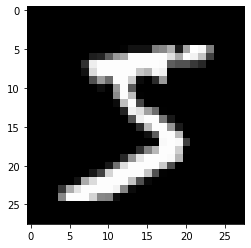

In [6]:
firts_element = minist_dataset['data'][0,:]
print ("shape is one diamention 784  i will convert it to 28 * 28 ", firts_element.shape)
firts_image = firts_element.reshape(28,28)
plt.imshow(firts_image,cmap="gray")
# it is no 5 u can check data [1,:]


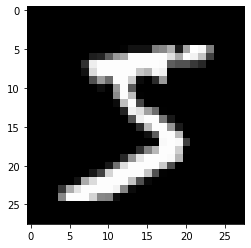

In [7]:
# note if u divide any image on 255 it will be the same result
firts_image = firts_element.reshape(28,28)/255
plt.imshow(firts_image,cmap="gray")


In [8]:
# show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to target
dtypes: object(785)
memory usage: 419.2+ MB


In [9]:
## df type is objects that take alot of memory size memory usage: 419.2+ MB
df = df.astype(np.int32)
df.info()
## after conversion memory usage: 209.6 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to target
dtypes: int32(785)
memory usage: 209.6 MB


In [10]:
# all target Numbers
df["target"].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

In [11]:
#preprocessing
# we can not normalize or standarize this numbers as most numbers are 0 11 00 ,
# you should get the min an the max no
# the max should be 255
# if it is 255 divide the data 255
# we mention  before if you dvide image by 255 it will be the same reuslts
print ("min val  ", min(df.min()))
print ("max val  ", max(df.max()))

min val   0
max val   255


In [12]:
X = df.drop(columns=['target'], axis=1)
y = df['target']
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: target, Length: 70000, dtype: int32

In [13]:
# normalize the X data Dvide by 255. [255 . "." here float to get all float values not int]
X = X /255.


In [14]:
## split data 
## for testing purpose I will take only take till 200 000 rows

X_train = X[:20000] # should be 60000
y_train = y[:20000]  # should be 60000

X_test = X[60000:]
y_test = y[60000:]

print("X_train shape", X_train.shape)
print("Y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", y_test.shape)


X_train shape (20000, 784)
Y_train shape (20000,)
X_test shape (10000, 784)
Y_test shape (10000,)


## Pinary classification (true or false)

In [69]:
# check for 5 (classfication for 5)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print ("y_train_5.shape" , y_train_5.shape)
print ("X_train.shape" , X_train.shape)
print ("y_train_5.shape" , y_train.shape)
y_train_5
# true fase 1 0

y_train_5.shape (20000,)
X_train.shape (20000, 784)
y_train_5.shape (20000,)


0         True
1        False
2        False
3        False
4        False
         ...  
19995    False
19996     True
19997    False
19998    False
19999    False
Name: target, Length: 20000, dtype: bool

In [16]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [17]:
## Model
#random_state shuffle
sGDClassifier = SGDClassifier(penalty=None, random_state=42)
sGDClassifier.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
# cross validation scrore it is not the best because it might be by chance
#if the model says always false and  most of the data is false
c= cross_val_score (estimator=sGDClassifier, X= X_train, y= y_train_5, cv=5,n_jobs=1 , scoring="accuracy")
print ("mean is ", c.mean())
print ("std is ", c.std())


mean is  0.9674000000000001
std is  0.0034770677301427257


In [19]:
## sum of true [1] is 1775 most data false this metric is not fair (accuercy)
sum = np.sum (y_train_5) 
res= (20000 - sum) /20000
res


0.91125

In [36]:
# cross_val_predict with predict
## cross_val_predict here i will do prediction [ method="predict"] on the fold by fold predict data
## y_pred_sgd predicted data resultes   [true- falses]
y_pred_sgd =  cross_val_predict(estimator=sGDClassifier, X= X_train, y= y_train_5, cv=5,n_jobs=1 , method="predict")
print ("y_pred_sgd ", y_pred_sgd.shape)

y_pred_sgd  (20000,)


In [63]:
# get true indexs of predicted data resultes
true5, = np.where(y_pred_sgd )
print ("true5"  ,true5.shape)
print ("true5 index0  "  ,true5[0])
print ("true5 index1 "  ,true5[1])


# check item [0] of y_pred_sgd
print ("prediction results of 0 ", y_pred_sgd[0])
print ("prediction results of 1 ", y_pred_sgd[1])
print ("prediction results of 8 ", y_pred_sgd[8])
print ("prediction results of 11 ", y_pred_sgd[11])
print ("prediction results of 35 ", y_pred_sgd[35])




#confusion_matrix 
confmat_sgd = confusion_matrix (y_train_5, y_pred_sgd)
# i  looking for 5 >  17894 TN most data is false, 331 FP 
#                  > 321 FN, 1454 TP

true5 (1785,)
true5 index0   11
true5 index1  35
prediction results of 0  False
prediction results of 1  False
prediction results of 8  False
prediction results of 11  True
prediction results of 35  True


## Heatmap

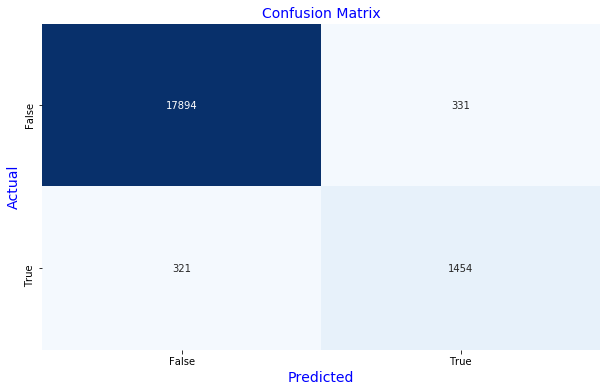

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])   ## to only handle the names in proper way
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])   ## to only handle the names in proper way
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()


In [23]:
# precison manual
1454 / (1454+ 331)

0.8145658263305322

In [24]:
# Recall manual
1454 / (1454+ 321)

0.8191549295774648

In [25]:
#precision_score
precision_score(y_train_5, y_pred_sgd)

0.8145658263305322

In [26]:
#recall_score metric
recall_score(y_train_5, y_pred_sgd)

0.8191549295774648

In [27]:
# the important metric
f1_score(y_train_5, y_pred_sgd)

0.8168539325842697

In [28]:
# look in True         True  row in report       
cls = classification_report(y_train_5, y_pred_sgd)
print (cls)

              precision    recall  f1-score   support

       False       0.98      0.98      0.98     18225
        True       0.81      0.82      0.82      1775

    accuracy                           0.97     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [37]:
# cross_val_predict with decision_function
# get tradeoff [threshold] between precision / recall  
# decision_function returns score for every feature 

y_scored_sgd_scores =  cross_val_predict(estimator=sGDClassifier,
                                         X= X_train, y= y_train_5, cv=5,n_jobs=1 , method="decision_function")
print ("y_scored_sgd_scores  ", y_scored_sgd_scores.shape)
y_scored_sgd_scores

y_scored_sgd_scores   (20000,)


-4.7122842583225975

In [67]:
print ("y_train_5 [0] ", y_train_5 [0] , "y_scored_sgd_scores [1] ", y_scored_sgd_scores[1])
#check decision_function
sGDClassifier.decision_function(X_train)

y_train_5 [0]  True y_scored_sgd_scores [1]  -88.6434128250494


array([   2.2530607 ,  -72.14470521, -154.19354875, ...,  -16.92025899,
       -121.49354645, -126.81183926])

(19728,) (19728,) (19727,)


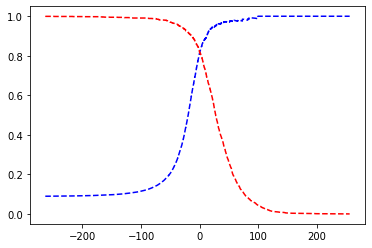

In [31]:
# get threshold curve 
# returns 3 values  precision - recall and  thresholds between
precision_val, recall_val, thresholds_vla =  precision_recall_curve (y_train_5,y_scored_sgd_scores)

print (precision_val.shape, recall_val.shape, thresholds_vla.shape)
## thresholds_vla.shape is less 1 so please use  -1 here precision_val[:-1], recall_val[:-1] 
plt.plot(thresholds_vla, precision_val[:-1], 'b--', label= "precision")
plt.plot(thresholds_vla, recall_val[:-1], 'r--', label="recall")

## If you want to care about some spesfic metric [Theif Or Not Theif] reduce (FP or FN)

In [32]:
precision_score_before = precision_score(y_train_5, y_pred_sgd)
print ("precision_score_before ", precision_score_before)
# if i want to increase precision score with 50 - reduce FP
precision_score_after = precision_score(y_train_5, y_scored_sgd_scores > 50)
print ("precision_score_after ", precision_score_after)

# we have to change 
recall_score_before = recall_score(y_train_5, y_pred_sgd)
print ("recall_score ", recall_score_before)
# if i want to decrease recall score with 50
recall_score_after = recall_score(y_train_5, y_scored_sgd_scores > 50)
print ("recall_score_after ", recall_score_after)


precision_score_before  0.8145658263305322
precision_score_after  0.9706498951781971
recall_score  0.8191549295774648
recall_score_after  0.2608450704225352


In [33]:
precision_score_before = precision_score(y_train_5, y_pred_sgd)
print ("precision_score_before ", precision_score_before)
# if i want to decrease precision score with 100 
precision_score_after = precision_score(y_train_5, y_scored_sgd_scores > -100)
print ("precision_score_after  ", precision_score_after)

# we have to change 
recall_score_before = recall_score(y_train_5, y_pred_sgd)
print ("recall_score       ", recall_score_before)
# if i want to increase recall score with 100 - reduce FN
recall_score_after = recall_score(y_train_5, y_scored_sgd_scores > -100)
print ("recall_score_after ", recall_score_after)


precision_score_before  0.8145658263305322
precision_score_after   0.11551090097189388
recall_score        0.8191549295774648
recall_score_after  0.9909859154929578


## ROC

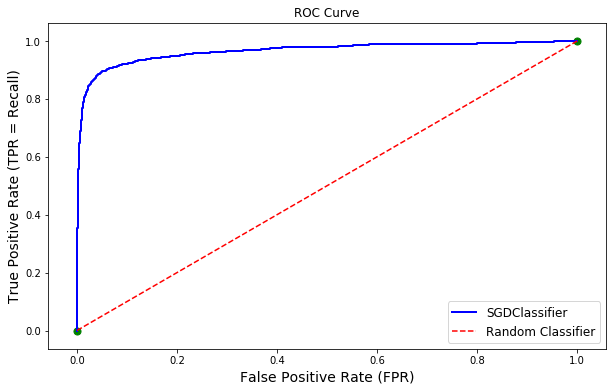

In [34]:

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_5, y_scored_sgd_scores)


## Plotting
plt.figure(figsize=(10, 6))
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, color='b', label='SGDClassifier')
plt.plot([1, 0], [1, 0], 'r--', label='Random Classifier')
plt.scatter(0, 0, color='g', s=50)
plt.scatter(1, 1, color='g', s=50)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR = Recall)', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [35]:
## To get the AUC (Area under Curve) 
auc_sgd = roc_auc_score(y_train_5, y_scored_sgd_scores)
print('Area Under Curve using SGD -- ', auc_sgd)

Area Under Curve using SGD --  0.9652924979230666
